In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204


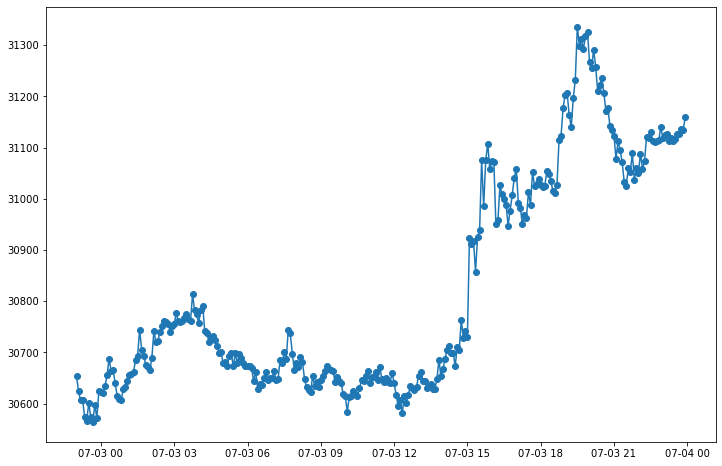

In [3]:
data = data[['open']]
plt.figure(figsize=(12, 8))
plt.plot(data[-300:], marker='o', label='open')
plt.show()

In [4]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.special import gamma
from collections import defaultdict
from random import choice, random, randint

In [5]:
def kth_element(arr, l: int, r: int, k: int):
    if r - l == 1:
        return arr[l]
    pivot = choice(arr[l: r])
    lq = l
    rq = r - 1
    while lq <= rq:
        if arr[lq] <= pivot:
            lq += 1
        else:
            arr[lq], arr[rq] = arr[rq], arr[lq]
            rq -= 1
    print(l, r, pivot, k)
    if k < lq - l:
        return kth_element(arr, l, lq, k)
    return kth_element(arr, lq, r, k - (lq - l))

def get_kth_element(arr, k):
    k = min(k, len(arr))
    # return kth_element(arr, 0, len(arr), k)
    return sorted(arr)[k]



<b>Functions for clusters and vectors</b>

In [6]:
def volume(r, m):
    return np.pi ** (m / 2) * r ** m / gamma(m / 2 + 1)



In [25]:
class Wishart: 
    radius: int
    u: int
    
    def __init__(self, r: int, u: int):
        self.radius = r
        self.u = u
        
    def significant(self, cluster, p):
        dif = [abs(p[i] - p[j]) for i, j in zip(cluster, cluster)]
        return max(dif) >= self.u
    
        
    def fit(self, x):
        n = len(x)
        m = len(x[0])
        dist = squareform(pdist(x))
        dr = []
        # print(dist)
        for i in range(n):
            dr.append(get_kth_element(dist[i], self.radius - 1))
        
        p = [self.radius / (volume(i, m) * n) for i in dr]
        label = 1
        w = np.full(n, 0)
        completed = {0: False}
        vertices = []
        for d, i in sorted(zip(dr, range(n))):
            neighbours = []
            neighbours_w = []
            clusters = defaultdict(list)
            for j in vertices:
                if dist[i][j] <= d:
                    neighbours.append(j)
                    neighbours_w.append(w[j])
                    clusters[w[j]].append(j)
            vertices.append(i)
            if len(neighbours) == 0:
                w[i] = label
                completed[label] = False
                label += 1
            elif len(neighbours_w) == 1:
                wj = min(neighbours_w)
                if completed[wj]:
                    w[i] = 0
                else:
                    w[i] = wj
            else:
                if all([completed[l] for l in neighbours_w]):
                    w[i] = 0
                    continue
                significant_clusters = set(wj for wj in neighbours_w if self.significant(clusters[wj], p))
                if len(significant_clusters) > 1:
                    w[i] = 0
                    for wj in neighbours_w:
                        if wj in significant_clusters:
                            completed[wj] = (wj != 0)
                            continue
                        for v in clusters[wj]:
                            w[v] = 0
                else:
                    if len(significant_clusters) == 1:
                        c1 = next(iter(significant_clusters))
                    else:
                        c1 = min(neighbours_w)
                    w[i] = c1
                    for wj in neighbours_w:
                        for v in clusters[wj]:
                            w[v] = c1

        return w

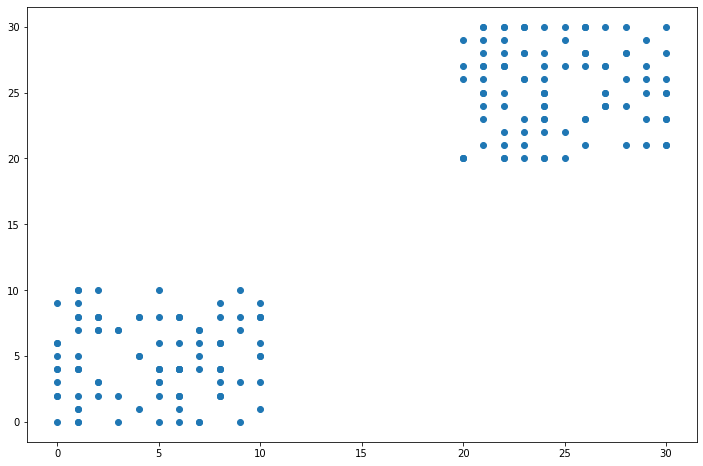

In [28]:
x = [randint(0, 10) for i in range(100)] + [randint(20, 30) for i in range(100)]
y = [randint(0, 10) for i in range(100)] + [randint(20, 30) for i in range(100)]

plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.show()

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


/tmp/ipykernel_18315/1229985736.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


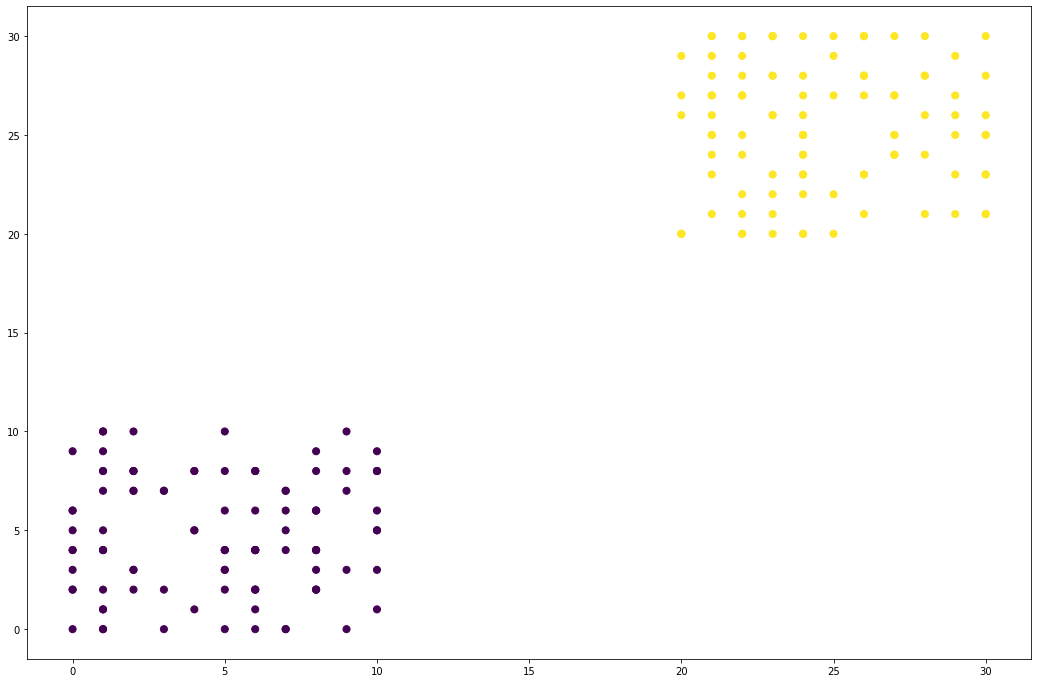

In [29]:
wishart = Wishart(11, 10)
# w = wishart.fit([[0, 1], [2, 3], [3, 5], [4, 2]])
w = wishart.fit(list(zip(x, y)))
# plt.figure(figsize=(12, 8))
print(w)
# plt.scatter(x, y, w)
# plt.text(x[0],y[0],w[0], ha="center", va="center")
# for i in range(2):
fig = plt.figure(figsize=(18, 12))
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=w,s=50)
#     plt.text(x[i],y[i],w[i], ha="center", va="center")
fig.show()